In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

import datetime

import pylab  as pl 
import pandas as pd
import numpy  as np

In [2]:
index = pd.read_json("https://archive.analytics.mybinder.org/index.jsonl",
                     lines=True)

In [3]:
# get all days since start of June 2020.
now = datetime.datetime.now()
n   = (now - datetime.datetime(2020, 7, 1)).days

frames = []

count  = 0

for idx, day in index.sort_index(ascending=False).iterrows():
    df = pd.read_json("https://archive.analytics.mybinder.org/{}".format(day['name']), lines=True)
    frames.append(df)

    if len(frames) > n:
        break

    print(count, n)
    
    count += 1
        
print(f"Fetched data for {n} days.")

0 106
1 106
2 106
3 106
4 106
5 106
6 106
7 106
8 106
9 106
10 106
11 106
12 106
13 106
14 106
15 106
16 106
17 106
18 106
19 106
20 106
21 106
22 106
23 106
24 106
25 106
26 106
27 106
28 106
29 106
30 106
31 106
32 106
33 106
34 106
35 106
36 106
37 106
38 106
39 106
40 106
41 106
42 106
43 106
44 106
45 106
46 106
47 106
48 106
49 106
50 106
51 106
52 106
53 106
54 106
55 106
56 106
57 106
58 106
59 106
60 106
61 106
62 106
63 106
64 106
65 106
66 106
67 106
68 106
69 106
70 106
71 106
72 106
73 106
74 106
75 106
76 106
77 106
78 106
79 106
80 106
81 106
82 106
83 106
84 106
85 106
86 106
87 106
88 106
89 106
90 106
91 106
92 106
93 106
94 106
95 106
96 106
97 106
98 106
99 106
100 106
101 106
102 106
103 106
104 106
105 106
Fetched data for 106 days.


In [4]:
df = pd.concat(frames)

In [5]:
# make it easier to grab the ref
def get_repo(spec):
    s = spec.rsplit("/", 1)[0]
    if s.endswith('.git'):
        s = s[:-4]
    return s

df['repo'] = df['spec'].apply(get_repo) #lambda s: s.rsplit("/", 1)[0].replace(".git", ""))
df['org'] = df['spec'].apply(lambda s: s.split("/", 1)[0])

In [6]:
# take a look at the data, does it look sensible?
df.sample(10)

,timestamp,schema,version,provider,spec,ref,status,origin,repo,org
18531,2020-10-06 15:28:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
2774,2020-09-10 03:19:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
15514,2020-07-14 16:54:00+00:00,binderhub.jupyter.org/launch,4,GitHub,jupyterlab/jupyterlab-demo/try.jupyter.org,71b616307dcb9cba18262d8e5fa46ad828ca51e4,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
5160,2020-07-05 10:36:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
19842,2020-09-14 18:04:00+00:00,binderhub.jupyter.org/launch,4,GitHub,explosion/spacy-io-binder/live,46f7d6ffd6ec206023fbbc23b7a879fde19b3498,success,gesis.mybinder.org,explosion/spacy-io-binder,explosion
3931,2020-07-09 06:18:00+00:00,binderhub.jupyter.org/launch,4,GitHub,e2nIEE/pandapipes/master,dd72a58b61076280bc7ab7259aa811fa59d2e6e0,success,gesis.mybinder.org,e2nIEE/pandapipes,e2nIEE
24401,2020-09-11 22:06:00+00:00,binderhub.jupyter.org/launch,4,GitHub,binder-examples/r/master,a0ec8bb22ab5cef7709d8bf29c7d0b403f373da4,success,ovh.mybinder.org,binder-examples/r,binder-examples
10563,2020-08-05 13:13:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gke.mybinder.org,ipython/ipython-in-depth,ipython
5527,2020-07-14 07:59:00+00:00,binderhub.jupyter.org/launch,4,GitHub,ipython/ipython-in-depth/master,7e5ce96cc9251083979efdfc393425f1229a4a68,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
167,2020-08-21 00:16:00+00:00,binderhub.jupyter.org/launch,4,GitHub,wyattowalsh/explorations-in-envy-free-allocati...,f79ba7ca823f2fcb62b9f39f7508a72efe04b4d6,success,gke.mybinder.org,wyattowalsh/explorations-in-envy-free-allocations,wyattowalsh


In [7]:
df = df.drop(columns=['schema', 'version', 'spec', 'ref'])

In [8]:
df.sample(10)

,timestamp,provider,status,origin,repo,org
11045,2020-07-05 19:05:00+00:00,GitHub,success,turing.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
9047,2020-07-18 15:00:00+00:00,GitHub,success,gke.mybinder.org,nboitz/Angewandte-Geophysik,nboitz
12565,2020-07-27 15:33:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
25844,2020-09-21 23:33:00+00:00,GitHub,success,gke.mybinder.org,mvelezpu/intropython,mvelezpu
11990,2020-09-28 11:48:00+00:00,GitHub,success,gesis.mybinder.org,stellargraph/stellargraph,stellargraph
8118,2020-09-25 08:43:00+00:00,GitHub,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
5460,2020-08-19 07:13:00+00:00,GitHub,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
22456,2020-09-03 20:10:00+00:00,GitHub,success,gke.mybinder.org,jupyterlab/jupyterlab-demo,jupyterlab
24074,2020-09-17 21:32:00+00:00,GitHub,success,gesis.mybinder.org,ipython/ipython-in-depth,ipython
909,2020-07-17 01:45:00+00:00,GitHub,success,gke.mybinder.org,NeuromatchAcademy/course-content,NeuromatchAcademy


In [9]:
np.any(df['repo'] == 'michaelJwilson/DESI-HighSchool')

True

In [10]:
ds = df[df['repo'] == 'michaelJwilson/DESI-HighSchool']

In [11]:
ds['pd_timestamp'] = pd.to_datetime(ds.timestamp)

/Users/MJWilson/opt/miniconda3/envs/desihigh/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
ds.sort_values(by='pd_timestamp')

,timestamp,provider,status,origin,repo,org,pd_timestamp
2953,2020-07-09 04:59:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 04:59:00+00:00
2980,2020-07-09 05:03:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:03:00+00:00
3015,2020-07-09 05:04:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:04:00+00:00
3108,2020-07-09 05:12:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:12:00+00:00
3107,2020-07-09 05:12:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-07-09 05:12:00+00:00
...,...,...,...,...,...,...,...
24939,2020-10-12 23:29:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-10-12 23:29:00+00:00
1948,2020-10-13 02:45:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-10-13 02:45:00+00:00
17308,2020-10-13 14:35:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-10-13 14:35:00+00:00
2411,2020-10-15 03:21:00+00:00,GitHub,success,gke.mybinder.org,michaelJwilson/DESI-HighSchool,michaelJwilson,2020-10-15 03:21:00+00:00


In [13]:
daily = ds.set_index("timestamp").resample('D').count()

In [14]:
daily.head()

,provider,status,origin,repo,org,pd_timestamp
timestamp,,,,,,
2020-07-09 00:00:00+00:00,9,9,9,9,9,9
2020-07-10 00:00:00+00:00,0,0,0,0,0,0
2020-07-11 00:00:00+00:00,3,3,3,3,3,3
2020-07-12 00:00:00+00:00,0,0,0,0,0,0
2020-07-13 00:00:00+00:00,11,11,11,11,11,11


In [15]:
daily.tail()

,provider,status,origin,repo,org,pd_timestamp
timestamp,,,,,,
2020-10-11 00:00:00+00:00,1,1,1,1,1,1
2020-10-12 00:00:00+00:00,9,9,9,9,9,9
2020-10-13 00:00:00+00:00,2,2,2,2,2,2
2020-10-14 00:00:00+00:00,0,0,0,0,0,0
2020-10-15 00:00:00+00:00,2,2,2,2,2,2


Text(0.5, 0, '')

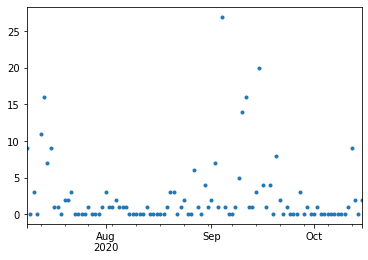

In [16]:
daily['repo'].plot(marker='.', lw=0.)

ax = pl.gca()

ax.set_xlabel('')

In [17]:
np.sum(daily['repo'])

237